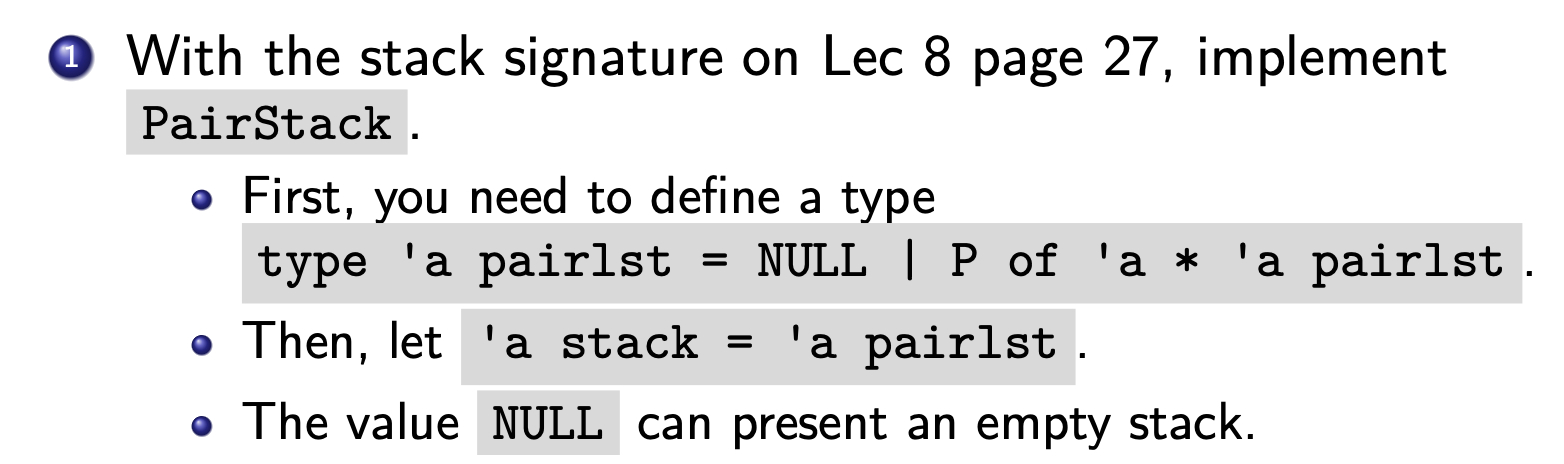

In [2]:
module type Stack = sig
  type 'a element
  type 'a stack
  exception Empty
  val empty : 'a stack
  val push: 'a stack -> 'a element -> 'a stack
  val pop: 'a stack -> 'a stack
  val peek: 'a stack -> 'a element
end;;

module type Stack =
  sig
    type 'a element
    type 'a stack
    exception Empty
    val empty : 'a stack
    val push : 'a stack -> 'a element -> 'a stack
    val pop : 'a stack -> 'a stack
    val peek : 'a stack -> 'a element
  end


In [6]:
type 'a pairlst = NULL | P of 'a * 'a pairlst;;

module PairStack:Stack with 
  type 'a element = 'a and
  type 'a stack = 'a pairlst = struct
  type 'a element = 'a
  type 'a stack = 'a pairlst
  exception Empty
  let empty = NULL
  let push s e = P(e, s)
  let pop = function 
    | NULL -> raise Empty
    | P(_, s) -> s
  let peek = function
    | NULL -> raise Empty
    | P(e, _) -> e
end;;

(* Test the stack implementation *)
let s = PairStack.empty;;
let s = PairStack.push s 1;;
let s = PairStack.push s 2;;
let s = PairStack.push s 3;;
let s = PairStack.pop s;;
let s = PairStack.pop s;;
let t = PairStack.peek s;;


type 'a pairlst = NULL | P of 'a * 'a pairlst


module PairStack :
  sig
    type 'a element = 'a
    type 'a stack = 'a pairlst
    exception Empty
    val empty : 'a stack
    val push : 'a stack -> 'a element -> 'a stack
    val pop : 'a stack -> 'a stack
    val peek : 'a stack -> 'a element
  end


val s : 'a PairStack.stack = NULL


val s : int PairStack.stack = P (1, NULL)


val s : int PairStack.stack = P (2, P (1, NULL))


val s : int PairStack.stack = P (3, P (2, P (1, NULL)))


val s : int PairStack.stack = P (2, P (1, NULL))


val s : int PairStack.stack = P (1, NULL)


val t : int PairStack.element = 1


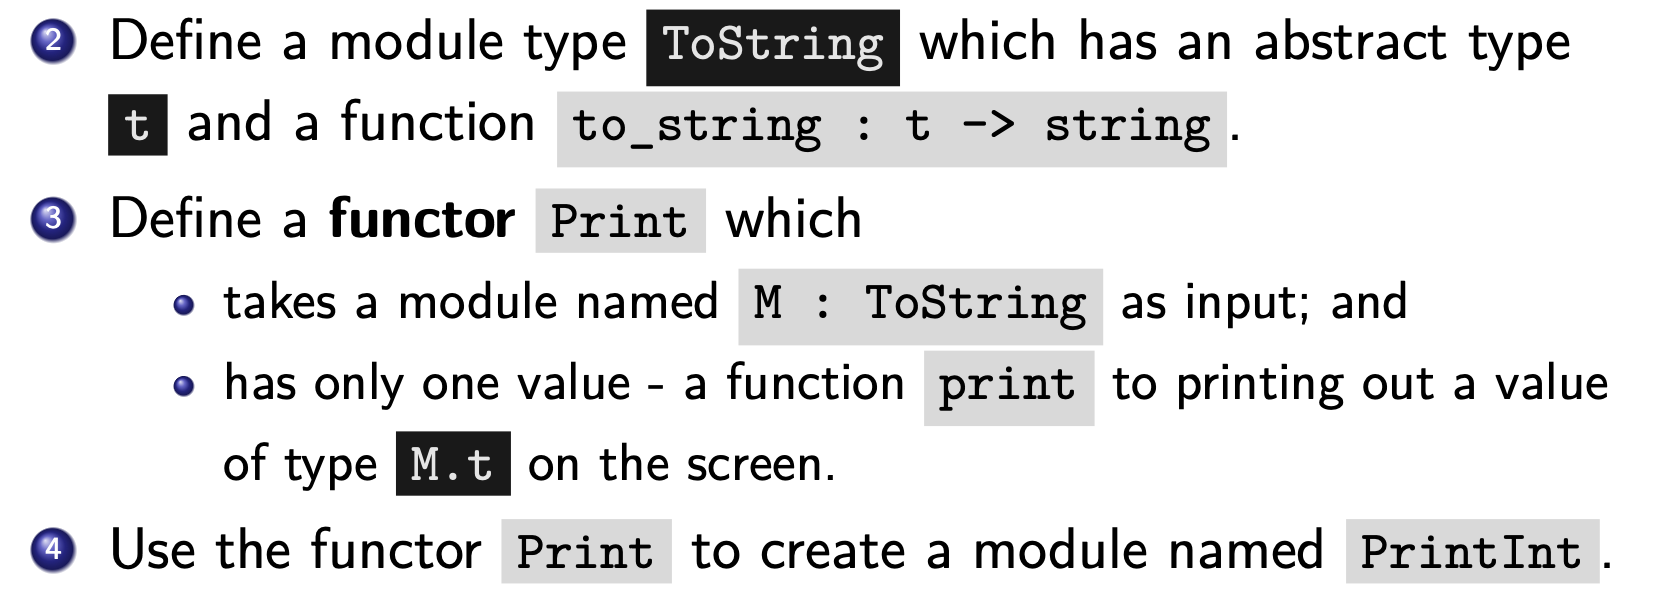

In [4]:
module type ToString = sig 
  type t 
  val to_string : t -> string 
end;;

module IntToString : ToString with type t = int = struct
  type t = int
  let to_string x = string_of_int x
end;;

module Print (M: ToString) = struct 
  let print x = print_string (M.to_string x) 
end;;

module PrintInt = Print(IntToString);;


module type ToString = sig type t val to_string : t -> string end


module IntToString : sig type t = int val to_string : t -> string end


module Print : functor (M : ToString) -> sig val print : M.t -> unit end


module PrintInt : sig val print : IntToString.t -> unit end
